In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import*
import networkx as nx

In [23]:
edges = [(0,1),(1,5),(5,6),(5,4),(1,2),
		 (1,3),(9,10),(2,4),(0,6),(6,7),
		 (8,9),(7,8),(1,7),(3,9),(5,8),
     (10,11),(9,12),(9,14),(14,12),(12,11),
     (14,11),(12,13),(13,14),(13,11),(10,13)]

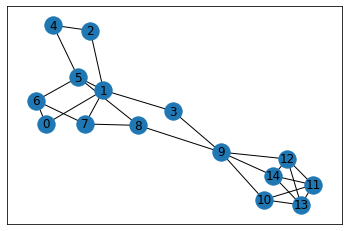

In [24]:
goal = 14
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_labels(G,pos)
nx.draw_networkx_edges(G,pos)
show()

In [26]:
MATRIX_SIZE = 15
M = np.matrix(np.ones(shape=(MATRIX_SIZE,MATRIX_SIZE)))
M*=-1

In [27]:
for point in edges:
  print(point)
  if point[1] == goal:
    M[point] = 100
  else:
    M[point] = 0

  if point[0] == goal:
    M[point[::-1]] = 100
  else:
    M[point[::-1]] = 0

M[goal,goal] = 100
print(M)

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(1, 3)
(9, 10)
(2, 4)
(0, 6)
(6, 7)
(8, 9)
(7, 8)
(1, 7)
(3, 9)
(5, 8)
(10, 11)
(9, 12)
(9, 14)
(14, 12)
(12, 11)
(14, 11)
(12, 13)
(13, 14)
(13, 11)
(10, 13)
[[ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.]
 [  0.  -1.   0.   0.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.]
 [ -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.
   -1.]
 [ -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.  -1.
   -1.]
 [  0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.  -1.
   -1.]
 [ -1.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.
   -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.   0.  -1.
  100.]
 [ -1.

In [28]:
gamma = 0.89
Q = np.matrix(np.zeros(shape=(MATRIX_SIZE,MATRIX_SIZE)))

In [37]:
def Possible_state(state):
	current_state = M[state, ]
	available_action = np.where(current_state >= 0)[1]
	return (available_action) 

def Next_states(state_set):
  next_state = np.random.choice(state_set)
  return next_state

def Update_Matrix(current_state,action,gamma):
  max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]
  if max_index.shape[0]>1:
    max_index = int(np.random.choice(max_index,1))
  else:
    max_index = int(max_index)
  
  max_value = Q[action, max_index]
  Q[current_state,action] = M[current_state,action] + gamma * max_value
  
  if (np.max(Q) > 0):
    return np.sum(Q/np.max(Q)*100)
  else:
    return Q

In [43]:
scores = []
for i in range(2000):
  current_state = np.random.randint(0,int(Q.shape[0]))
  available_path = Possible_state(current_state)
  next_path = Next_states(available_path)
  score = Update_Matrix(current_state,next_path,gamma)
  scores.append(score)

print(Q/np.max(Q)*100)

[[  0.          70.4969       0.           0.           0.
    0.          62.742241     0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ 62.73706382   0.          62.742241    79.21         0.
   70.4969       0.          70.49108295   0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.          70.4969       0.           0.          62.742241
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.          70.4969       0.           0.           0.
    0.           0.           0.           0.          89.
    0.           0.           0.           0.           0.        ]
 [  0.           0.          62.742241     0.           0.
   70.4969       0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.          70.4969       0.           0.          62.737063

In [51]:
current_state = 0
path = []
while current_state!=14:
  next_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1]
  if next_index.shape[0]>1:
    next_index = int(np.random.choice(next_index,1))
  else:
    next_index = int(next_index)
  
  path.append(next_index)
  current_state = next_index
print(path)

[1, 3, 9, 14]


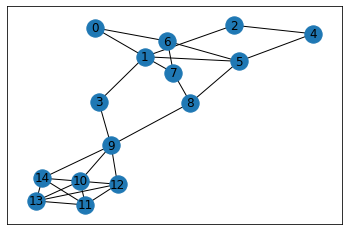

In [45]:
goal = 14
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_labels(G,pos)
nx.draw_networkx_edges(G,pos)
show()